In [14]:
#required library installed 
!pip install pandas nltk vaderSentiment requests matplotlib

In [15]:
import requests

def fetch_news(api_key, query, page_size=5):
    url = f"https://newsapi.org/v2/everything?q={query}&pageSize={page_size}&apiKey={api_key}"
    response = requests.get(url)
    return response.json()['articles']

api_key = '6764bed8288d484c9f78c4bebd6f0631'
query = 'Coronavirus' 
news_articles = fetch_news(api_key, query)
print(news_articles)


[{'source': {'id': None, 'name': 'BBC News'}, 'author': None, 'title': "No need for 'large' council tax hikes - Robison", 'description': 'The finance secretary says a record funding deal should prevent an increase - but the decision will rest with local authorities.', 'url': 'https://www.bbc.com/news/articles/cj49vn7jlr5o', 'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/fe12/live/45b33df0-b2ee-11ef-a2ca-e99d0c9a24e3.jpg', 'publishedAt': '2024-12-05T10:03:06Z', 'content': 'Finance Secretary Shona Robison says council\'s should be "sensible" about tax increases \r\nCouncil tax increases should be kept to a "minimum" next year, Finance Secretary Shona Robison has claimed.\r\n… [+2175 chars]'}, {'source': {'id': None, 'name': 'BBC News'}, 'author': None, 'title': 'Car loan scandal payout fears as row drags on', 'description': 'People who were unaware of commission paid when they bought a car on finance may be in line for payouts, but face delays.', 'url': 'https://www.bbc.c

In [16]:
import re

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

def analyze_articles(news_articles):
    sentiments = []
    for article in news_articles:
        # Replace None with an empty string
        title = article['title'] if article['title'] is not None else ""
        description = article['description'] if article['description'] is not None else ""
        
        text = title + " " + description
        cleaned_text = preprocess_text(text)
        sentiment_score = analyze_sentiment(cleaned_text)
        sentiments.append((title, sentiment_score))
    return sentiments

# Analyze the articles
sentiments = analyze_articles(news_articles)
print(sentiments)


[("No need for 'large' council tax hikes - Robison", 0.0258), ('Car loan scandal payout fears as row drags on', -0.5574), ('15 up-and-coming AI-powered fintech startups, according to top VCs', 0.6597), ('[Removed]', 0.0), ('Chrystia Freeland resigns as Minister of Finance', -0.3182)]


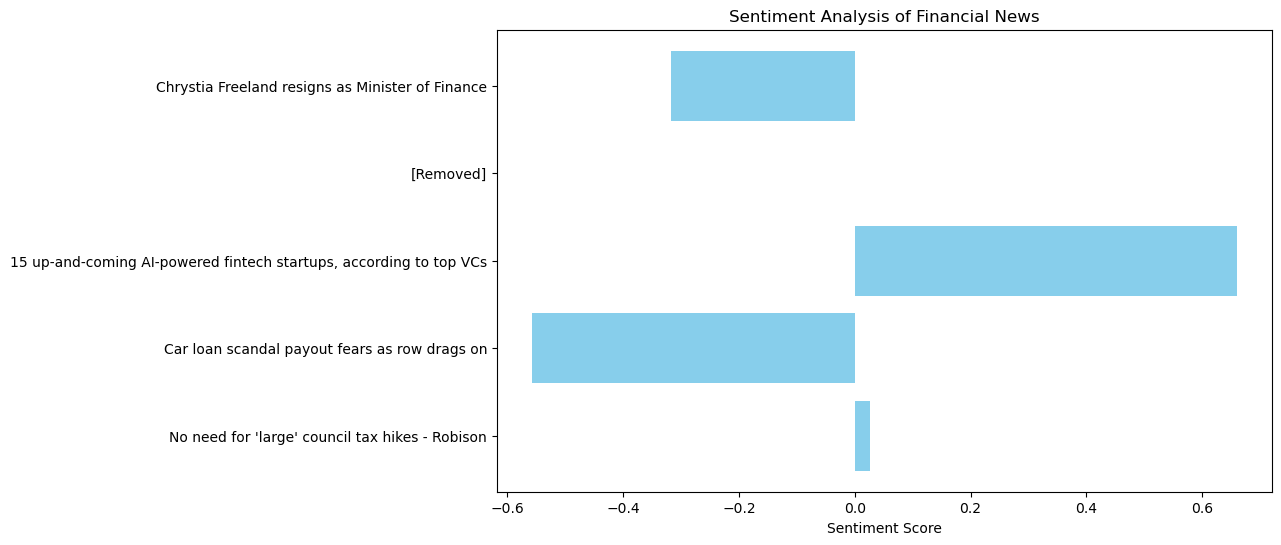

In [18]:
import matplotlib.pyplot as plt

def plot_sentiment_analysis(sentiments):
    titles = [x[0] for x in sentiments]
    sentiment_scores = [x[1] for x in sentiments]
    
    plt.figure(figsize=(10, 6))
    plt.barh(titles, sentiment_scores, color='skyblue')
    plt.xlabel('Sentiment Score')
    plt.title('Sentiment Analysis of Financial News')
    plt.show()

plot_sentiment_analysis(sentiments)


In [19]:
import pandas as pd

def save_to_csv(sentiments, filename='sentiment_results.csv'):
    df = pd.DataFrame(sentiments, columns=['Title', 'Sentiment Score'])
    df.to_csv(filename, index=False)

save_to_csv(sentiments)
